In [4]:
import json
import os

path = os.path.join("games", "mm_mapworld", "in", "instances.json")
with open(path, "r") as f:
    instances = json.load(f)
instance = instances["experiments"][0]["game_instances"][0]

In [6]:
instance["edges"]

['((2, 3), (1, 3))',
 '((1, 3), (1, 2))',
 '((1, 2), (0, 2))',
 '((1, 3), (2, 3))',
 '((1, 2), (1, 3))',
 '((0, 2), (1, 2))']

In [7]:
import games.mm_mapworld.utils as utils

loaded_instance = utils.load_instance(instance)

In [18]:
custom_instance = {
    "nodes": [(0,1), (1,1), (2,1), (1,0), (2,0), (3,0)],
    "edges": [((0,1), (1,1)), ((1,1), (2,1)), ((1,1), (1,0)), ((1,0), (2,0)), ((2,0), (3,0))],
    "imgs": {
        (0,1): "games/mm_mapworld/resources/ade_20k_reduced/ade_imgs/nursery/ADE_train_00013881.jpg", 
        (1,1): "games/mm_mapworld/resources/ade_20k_reduced/ade_imgs/bathroom/ADE_train_00000071.jpg", 
        (2,1): "games/mm_mapworld/resources/ade_20k_reduced/ade_imgs/recreation_room/ADE_train_00015776.jpg", 
        (1,0): "games/mm_mapworld/resources/ade_20k_reduced/ade_imgs\home_theater/ADE_train_00009418.jpg", 
        (2,0): "games/mm_mapworld/resources/ade_20k_reduced/ade_imgs/sunroom/ADE_train_00019088.jpg", 
        (3,0): "games/mm_mapworld/resources/ade_20k_reduced/ade_imgs/garage/ADE_val_00001379.jpg"
    }
    }
loaded_instance = custom_instance

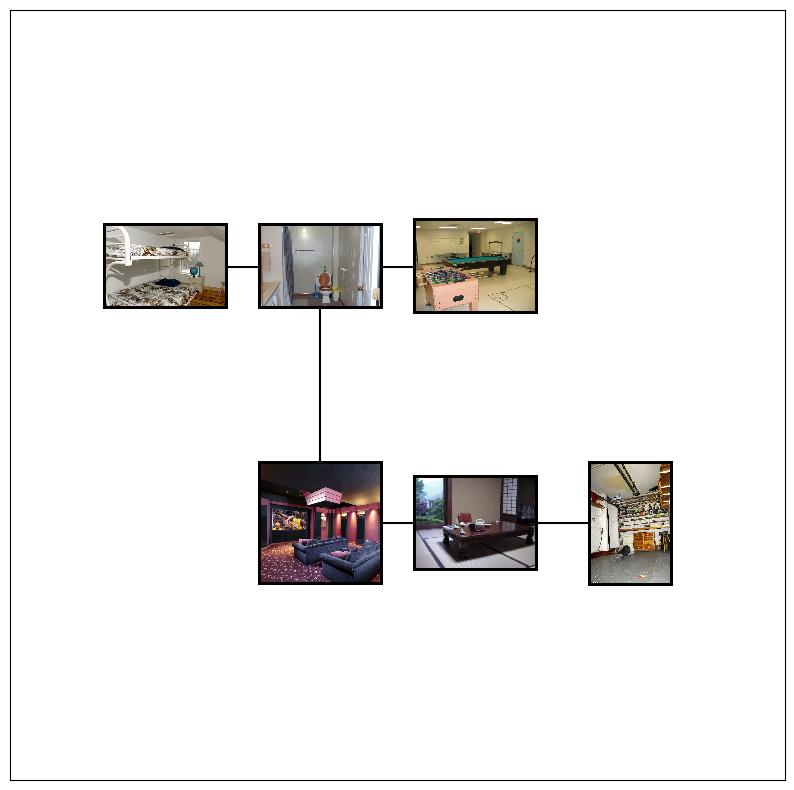

In [28]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
import matplotlib.image as image
import numpy as np

fig, ax = plt.subplots(figsize = (10, 10))
plt.xlim(-1, 4)
plt.ylim(-1, 2)
# ax.spines.right.set_visible(False)
# ax.spines.top.set_visible(False)
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
for node in loaded_instance["nodes"]:
    # load image
    node_image = image.imread(loaded_instance["imgs"][node])
    
    # add small frame to image
    b = int(0.025 * max(node_image.shape))
    ny, nx = node_image.shape[0], node_image.shape[1] 
    framed_img = np.zeros((b+ny+b, b+nx+b, node_image.shape[2]), dtype=np.uint8)
    framed_img[b:-b, b:-b] = node_image
    
    # resize image
    factor = 90/max(framed_img.shape)
    imbox = OffsetImage(framed_img, zoom=factor)
    # plop image into graph at the right position
    
    annbox = AnnotationBbox(imbox, node, frameon=False)
    ax.add_artist(annbox)
    # zorder should be higher than edges, so edges can be drawn longer that needed
    pass
for edge in loaded_instance["edges"]:
    plt.plot([edge[0][0], edge[1][0]], [edge[0][1], edge[1][1]], color='black', linestyle='-', zorder = 1)
last = path[0]
# plt.xlabel('X')
# plt.ylabel('Y')
plt.grid(False)
# fig.show()